# GPA Predictions Using Regressions

**Problem Statement:** Predict students GPA from their SAT score.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [10]:
df = pd.read_csv("gpa.csv")
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


# Data Wrangling

In [11]:
df.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [13]:
df.columns

Index(['SAT', 'GPA'], dtype='object')

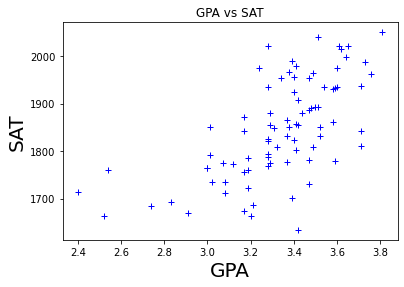

In [20]:
x = df.GPA
y= df.SAT
plt.xlabel('GPA' ,fontsize=20)
plt.ylabel('SAT',fontsize=20)
plt.title('GPA vs SAT')

plt.plot(x,y,'b+')

In [33]:
sat_df = df.drop('GPA',axis='columns')
sat_df.head()

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693


In [32]:
gpa = df.GPA
gpa.head()

0    2.40
1    2.52
2    2.54
3    2.74
4    2.83
Name: GPA, dtype: float64

In [34]:
reg = linear_model.LinearRegression()
reg.fit(sat_df,gpa)

LinearRegression()

In [40]:
pred = reg.predict([[1900],[1987],[1690]])
pred

array([3.42084759, 3.56489246, 3.0731531 ])

In [41]:
reg.coef_

array([0.00165569])

In [42]:
reg.intercept_

0.2750402996602803

### Y = m * X + b (m is coefficient and b is intercept)

In [43]:
Y = 0.00165569 * 1900 + 0.2750402996602803
Y

3.4208512996602805

In [44]:
Y = 0.00165569 * 1987 + 0.2750402996602803
Y

3.5648963296602805

In [45]:
Y = 0.00165569 * 1690 + 0.2750402996602803
Y

3.0731563996602804

In [49]:
ndf =pd.DataFrame({
    "SAT" :['1900','1987','1690']
})
ndf

,SAT
0,1900
1,1987
2,1690


In [57]:
pred =reg.predict(ndf)
pred

array([3.42084759, 3.56489246, 3.0731531 ])

In [59]:
 pre = pd.DataFrame({
    'GPA':pred
})
pre

,GPA
0,3.420848
1,3.564892
2,3.073153


In [63]:
pred_data = pd.concat([ndf,pre] , axis= 1) 
pred_data

,SAT,GPA
0,1900,3.420848
1,1987,3.564892
2,1690,3.073153
